In [1]:
# import some libraries
import numpy as np
import pandas as pd

from scipy.stats import poisson

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#read a file
#dfcmms=pd.read_excel('C:/Users/Chris/Pythonprojects/RAMS/inputfile/CMMS_demodata.xlsx', index_col=0, header=0) 
dfcmms=pd.to_datetime(["2015-01-21","2016-04-14","2016-11-08","2016-12-01"])
dfcmms=pd.DataFrame(dfcmms,columns=["Notif.date"])
dfcmms

In [7]:
#estimate the arrivals, given a presumed birthdate of the experiment
#note that in this setup, knowledge about what happened after the last arrival is presumed to be unknown!

birth=pd.to_datetime("2015-01-01")

dfcmms["arrival"]=dfcmms["Notif.date"]-birth
dfcmms["arrival"]

Notification
10336908    20 days
10735688   469 days
10979795   677 days
11014798   700 days
Name: arrival, dtype: timedelta64[ns]

In [9]:
#create a dataframe of the arrivals
#sort values on the arrival times

dfarrival=pd.DataFrame.append(pd.DataFrame({"arrival":dfcmms["arrival"]}),pd.DataFrame({"arrival":[birth-birth]}))

dfarrival=dfarrival.sort_values(by="arrival",ascending=True)
dfarrival["arrival"]=dfarrival["arrival"].dt.days
dfarrival["count"]=range(0,len(dfarrival["arrival"]))

dfarrival

,arrival,count
0,0,0
10336908,20,1
10735688,469,2
10979795,677,3
11014798,700,4


In [13]:
#estimate the MLE Poisson parameter

poismle=dfarrival["count"].max()/dfarrival["arrival"].max()

#eventually the experiment could be extended with an OLS estimation...

#poisols=dfarrival["arrival"].dot(dfarrival["count"])/dfarrival["arrival"].dot(dfarrival["arrival"])
+1/poismle

175.0

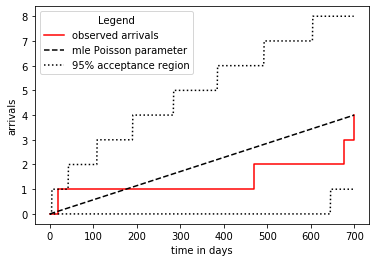

In [12]:

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) # one row, one column, first plot

line, = ax1.step(dfarrival["arrival"],
         dfarrival["count"],
         where="post",
        label="observed arrivals",
        color="red")

line, = ax1.plot(dfarrival["arrival"],
              dfarrival["arrival"]*poismle,
                label="mle Poisson parameter",
                color="black",
                linestyle="dashed")

line, = ax1.plot(np.arange(0,dfarrival["arrival"].max()),
               poisson.ppf(0.025,np.arange(0,dfarrival["arrival"].max())*poismle),
                label="95% acceptance region",
                color="black",
                linestyle="dotted")

line, = ax1.plot(np.arange(0,dfarrival["arrival"].max()),
               poisson.ppf(0.975,np.arange(0,dfarrival["arrival"].max())*poismle),
                color="black",
                linestyle="dotted")

xtext = ax1.set_xlabel('time in days') # returns a Text instance
ytext = ax1.set_ylabel('arrivals')

plt.legend(title='Legend')
#plt.savefig("C:/Users/Chris/Pythonprojects/RAMS/figures/PoissonPlot01.png")
#plt.show()

